In [160]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bankmarketing/bank marketing.csv


In [161]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

import csv 
import matplotlib.pyplot as plt

import pickle
import random
from keras.layers import Concatenate, concatenate
from keras.layers.normalization import BatchNormalization
import h5py
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [162]:
import pandas as pd
df = pd.read_csv("../input/bankmarketing/bank marketing.csv")


In [163]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'market?']

In [164]:
df.drop(['job', 'marital','education','contact','month','poutcome'], axis = 1, inplace=True) 

In [165]:
list(df.columns)

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'market?']

In [166]:
data = df.values
X = data[:,0:10]
Y = data[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [167]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_shape=(10,)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2051 (Dense)           (None, 20)                220       
_________________________________________________________________
dense_2052 (Dense)           (None, 1)                 21        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'] )
hist = model.fit(X_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
3390/3390 [==============================] - 1s 330us/step - loss: 0.3926 - accuracy: 0.8655
Epoch 2/10
3390/3390 [==============================] - 1s 304us/step - loss: 0.3632 - accuracy: 0.8805
Epoch 3/10
3390/3390 [==============================] - 1s 299us/step - loss: 0.3515 - accuracy: 0.8805
Epoch 4/10
3390/3390 [==============================] - 1s 297us/step - loss: 0.3345 - accuracy: 0.8805
Epoch 5/10
3390/3390 [==============================] - 1s 298us/step - loss: 0.3275 - accuracy: 0.8805
Epoch 6/10
3390/3390 [==============================] - 1s 319us/step - loss: 0.3299 - accuracy: 0.8805
Epoch 7/10
3390/3390 [==============================] - 1s 309us/step - loss: 0.3285 - accuracy: 0.8805
Epoch 8/10
3390/3390 [==============================] - 1s 299us/step - loss: 0.3251 - accuracy: 0.8805
Epoch 9/10
3390/3390 [==============================] - 1s 297us/step - loss: 0.3206 - accuracy: 0.8799
Epoch 10/10
3390/3390 [==============================] - 1s 297u

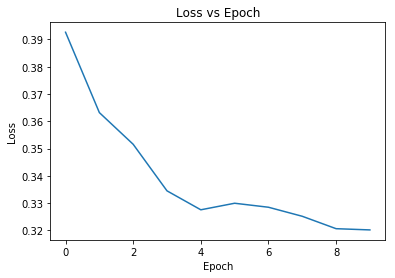

In [169]:
plt.plot(hist.history['loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [170]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\n Test loss: ', test_loss)


Test accuracy: 0.8974359035491943

 Test loss:  0.29897096504767734


In [171]:
def Fitness_Maximize(N1, N2, a, b):
 return (N1 + N2) / (1 + a*N2 + b*N1)

In [172]:
#GA
class GeneticNeuralNetwork(Sequential):
    # Constructor
    def __init__(self, child_weights=None):
        # Initialize Sequential Model Super Class
        super().__init__()
        # If no weights provided randomly generate them
        if child_weights is None:
            # Layers are created and randomly generated
            layer1 = Dense(20, input_shape=(10,), activation='sigmoid')
            layer2 = Dense(1, activation='sigmoid')
            # Layers are added to the model
            self.add(layer1)
            self.add(layer2)
        # If weights are provided set them within the layers
        else:
            # Set weights within the layers
            self.add(
                Dense(
                    20,
                    input_shape=(10,),
                    activation='sigmoid',
                    weights=[child_weights[0], np.zeros(20)])
                )
            self.add(
                Dense(
                 1,
                 activation='sigmoid',
                 weights=[child_weights[1], np.zeros(1)])
            )

    # Function for forward propagating a row vector of a matrix
    def forward_propagation(self, X_train, y_train):
        # Forward propagation
        y_hat = self.predict(X_train)
        # Compute fitness score
        conf_mat = confusion_matrix(y_train,y_hat.round())
        #number of data points from class1 that are placed in class2 by the model,
        a = conf_mat[0][1]
        #number of data points from class2 that are placed in class1 by the model
        b = conf_mat[1][0]
        #number of data points from class1
        N1 = y_train[y_train == 0].shape[0]
        #number of data points from class2
        N2 = y_train[y_train == 1].shape[0]
        #mazimizing the fitness function
        self.fitness = Fitness_Maximize(N1, N2, a, b)
        

    # Standard Backpropagation
    def compile_train(self, epochs):
        self.compile(
                      optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
                      )
        self.fit(X_train, y_train, epochs=epochs)

In [173]:
# Chance to mutate weights
def mutation(child_weights):
    temp_arr = []
    count = 0;
    for network in pool:
        child_weights = []
        
        for layer in network.layers:
            child_weights.append(layer.get_weights()[0])
    
        mutation = random.uniform(0, 1)
        if count < 5 and mutation < 0.1:
            for x in range(0,2):
                child_weights[x] *= random.randint(0,5)
        elif mutation > 0.3:
            for x in range(0,2):
                child_weights[x] *= random.randint(0,5)
                
        child = GeneticNeuralNetwork(child_weights)
        temp_arr.append(child)
    return temp_arr


# Crossover traits between two Genetic Neural Networks
def dynamic_crossover(nn1, nn2):
    # Lists for respective weights
    nn1_weights = []
    nn2_weights = []
    child_weights = []
    worst_individual = [] 
    # Get all weights from all layers in the first network
    for layer in nn1.layers:
        nn1_weights.append(layer.get_weights()[0])

    # Get all weights from all layers in the second network
    for layer in nn2.layers:
        nn2_weights.append(layer.get_weights()[0])

    # Iterate through all weights from all layers for crossover
    for i in range(0, len(nn1_weights)):
        # Get single point to split the matrix in parents based on # of cols
        split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
        # Iterate through after a single point and set the remaing cols to nn_2
        for j in range(split, np.shape(nn1_weights[i])[1]-1):
            nn1_weights[i][:, j] = nn2_weights[i][:, j]

        # After crossover add weights to child
        child_weights.append(nn1_weights[i])
        

    # Create and return child object
    child = GeneticNeuralNetwork(child_weights)
    return child

In [174]:
networks = []
pool = []
# Track Generations
generation = 0
# Initial Population
n = 25

# Generate n randomly weighted neural networks
for i in range(0, n):
    networks.append(GeneticNeuralNetwork())

# Cache Max Fitness
max_fitness = 0

# Max Fitness Weights
optimal_weights = []

# Evolution Loop
while (max_fitness < .90 and generation < 15):
    # Log the current generation
    generation += 1
    print('Generation: ', generation)

    # Forward propagate the neural networks to compute a fitness score
    for nn in networks:
        # Propagate to calculate fitness score
        nn.forward_propagation(X_train, y_train)
        # Add to pool after calculating fitness
        pool.append(nn)

    # Clear for propagation of next children
    networks.clear()

    # Sort based on fitness
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()
    mutatedPool = mutation(pool)
    pool.clear()
    
    for network in mutatedPool:
        network.forward_propagation(X_train, y_train)
        pool.append(network)
    
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()
    
    # Find Max Fitness and Log Associated Weights
    for i in range(0, len(pool)):
        # If there is a new max fitness among the population
        if pool[i].fitness > max_fitness:
            max_fitness = pool[i].fitness
            print('Max Fitness: ', max_fitness)
            # Reset optimal_weights
            optimal_weights = []
            # Iterate through layers, get weights, and append to optimal
            for layer in pool[i].layers:
                optimal_weights.append(layer.get_weights()[0])
            print(optimal_weights)

    # Crossover, top 5 randomly select 2 partners for child
    for i in range(0, 5):
        for j in range(0, 2):
            # Create a child and add to networks
            temp = dynamic_crossover(pool[i], random.choice(pool))
            # Add to networks to calculate fitness score next iteration
            networks.append(temp)

# Create a Genetic Neural Network with optimal initial weights
gnn = GeneticNeuralNetwork(optimal_weights)
gnn.compile_train(10)

# Test the Genetic Neural Network Out of Sample
y_hat = gnn.predict(X_test)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_hat.round()))

Generation:  1


TypeError: 'GeneticNeuralNetwork' object is not iterable